<a href="https://colab.research.google.com/github/Fredf23/TatChim/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ElasticNet_dataset_v_6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Подготовка данных**

## **Импорт библиотек**

In [ ]:
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from google.colab import drive

## **Работа с данными**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tathim/Datasets/dataset_v.6.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
input_features = data[[col for col in data.columns if col.startswith('X')]]
target_features = data[[col for col in data.columns if col.startswith('Y')]]
input_features=np.array(input_features)
target_features=np.array(target_features)

x_train, x_test, y_train, y_test = train_test_split(input_features, target_features, test_size=0.2, random_state=42)

In [ ]:
'''# Нормализирование данных
x_scaler = StandardScaler()
x_scaler = x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_scaler = y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)'''

# **Создание и обучение нейросети**

In [ ]:
_columns = [col for col in data.columns if col.startswith('Y')]
_columns.remove('Y_27')
print(_columns)

['Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_7', 'Y_8', 'Y_9', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14', 'Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19', 'Y_20', 'Y_21', 'Y_22', 'Y_23', 'Y_24', 'Y_25', 'Y_26', 'Y_28']


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

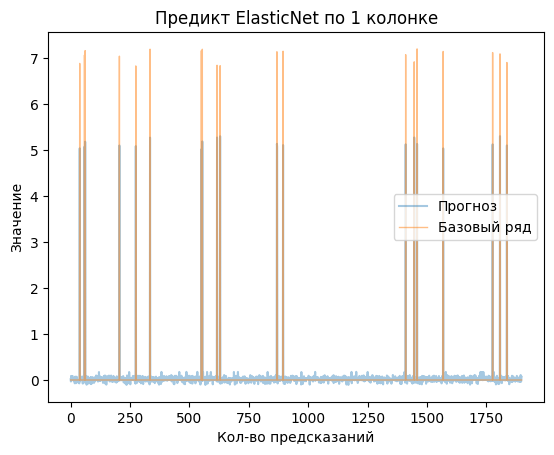

Максимальное отклонение Y_0: 0.1768089835682956
Среднее отклонение Y_0: -0.0010610708512625076
--------------------------------------------------
Максимальное отклонение Y_1: 0.11392462268456463
Среднее отклонение Y_1: -0.0016181980823882132
--------------------------------------------------
Максимальное отклонение Y_2: 12.81232468497901
Среднее отклонение Y_2: -0.06264752752504861
--------------------------------------------------
Максимальное отклонение Y_3: 12.536566102258238
Среднее отклонение Y_3: 0.166945815463881
--------------------------------------------------
Максимальное отклонение Y_4: 0.8704298381430088
Среднее отклонение Y_4: 0.00595720450927196
--------------------------------------------------
Максимальное отклонение Y_5: 17.08623678604563
Среднее отклонение Y_5: 0.12732082682917842
--------------------------------------------------
Максимальное отклонение Y_6: 272.61060815799766
Среднее отклонение Y_6: 3.1090323865584035
-----------------------------------------------

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

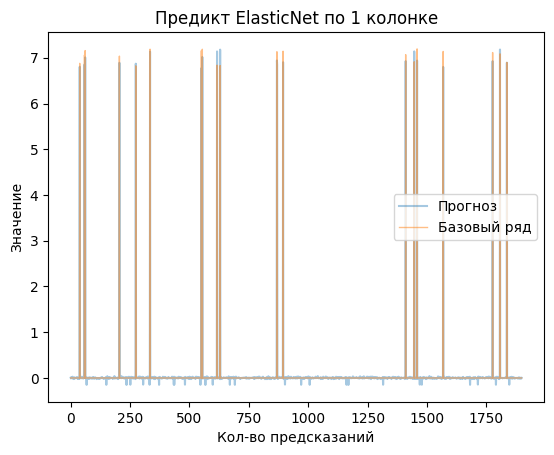

Максимальное отклонение Y_0: 0.34955577975185026
Среднее отклонение Y_0: -0.0013202663344954889
--------------------------------------------------
Максимальное отклонение Y_1: 0.1380665631192851
Среднее отклонение Y_1: -0.0016352103021978735
--------------------------------------------------
Максимальное отклонение Y_2: 10.467342578692039
Среднее отклонение Y_2: -0.040111137271059576
--------------------------------------------------
Максимальное отклонение Y_3: 12.306803814103056
Среднее отклонение Y_3: 0.13523567784944768
--------------------------------------------------
Максимальное отклонение Y_4: 0.6803752370907183
Среднее отклонение Y_4: 0.0031968657221466876
--------------------------------------------------
Максимальное отклонение Y_5: 16.741725915897437
Среднее отклонение Y_5: 0.15370444006383255
--------------------------------------------------
Максимальное отклонение Y_6: 426.7127142513389
Среднее отклонение Y_6: 3.614032922301057
------------------------------------------

In [ ]:
# Создание и обучение модели для мультирегрессии
rmse = []
for l1 in [.1, 1]:
  elastic = MultiTaskElasticNetCV(l1_ratio=l1, cv=16, verbose=True, max_iter=1100)
  model = elastic.fit(x_train, y_train)

  # Получение не скалированного ответа сети и действительного значения
  ypred = model.predict(x_test)

  mod_answ = ypred
  true = y_test
  #mod_answ = y_scaler.inverse_transform(ypred)
  #true = y_scaler.inverse_transform(y_test)


  # Отображение предикта сети по 1 колонке
  plt.plot(mod_answ[0:-1, 0],
           label='Прогноз',
           alpha=0.4,
           linewidth=1.5)

  plt.plot(true[0:-1, 0],
           label='Базовый ряд',
           alpha=0.5,
           linewidth=1)

  plt.title('Предикт ElasticNet по 1 колонке')
  plt.xlabel('Кол-во предсказаний')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

  # Переводим предикт и действительные значения в датафрейм, а затем получаем датафрейм сравнения
  mod_answ_df = pd.DataFrame(mod_answ, columns=[col for col in data.columns if col.startswith('Y')])
  true_df = pd.DataFrame(true, columns=[col for col in data.columns if col.startswith('Y')])
  diff = mod_answ_df.compare(true_df)

  diff.head()


  for col in _columns:
    max_dif = (diff[col]['self'] - diff[col]['other']).max()
    mean_dif = (diff[col]['self'] - diff[col]['other']).mean()
    print(f'Максимальное отклонение {col}: {max_dif}')
    print(f'Среднее отклонение {col}: {mean_dif}')
    print('-'*50)

    # Получение точности сети
  ypred = model.predict(x_test)
  score = model.score(x_test, y_test)
  mse = mean_squared_error(y_test, ypred)
  print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
        .format(score, mse, np.sqrt(mse)))

  rmse.append(np.sqrt(mse))

  accuracy = (true == mod_answ).mean() * 100
  print(f"Процентное соотношение абсолютно верно предсказанных значений: {accuracy:.2f}%")
  print(f'Оптимальное значение альфа: {model.alpha_}')
  print(f'Значение L1: {model.l1_ratio_}')

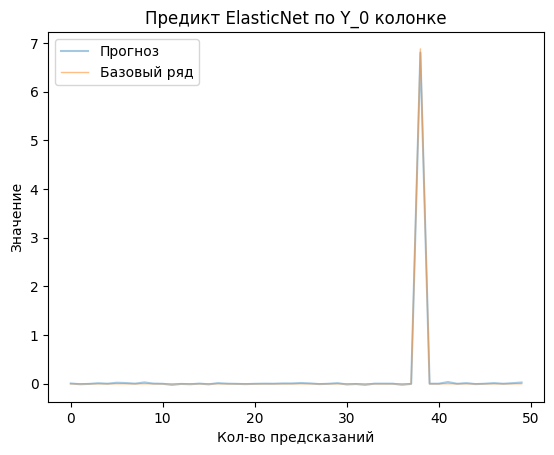

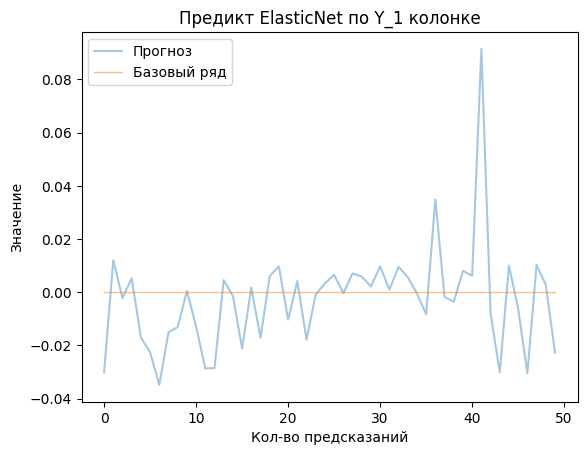

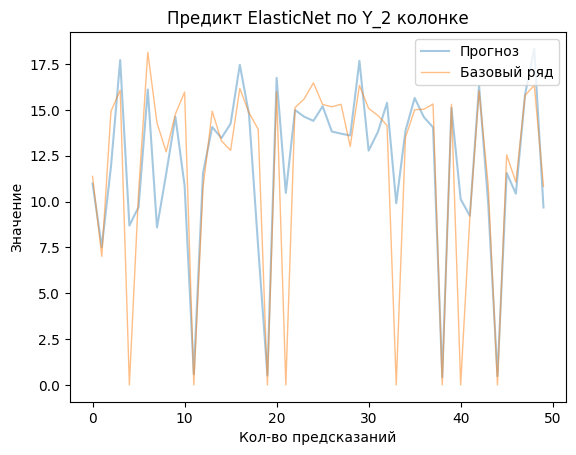

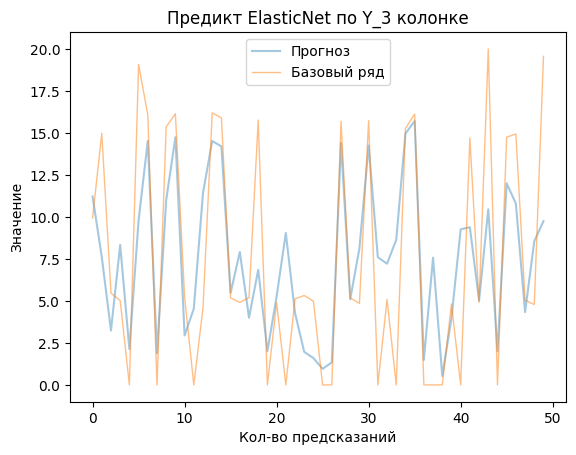

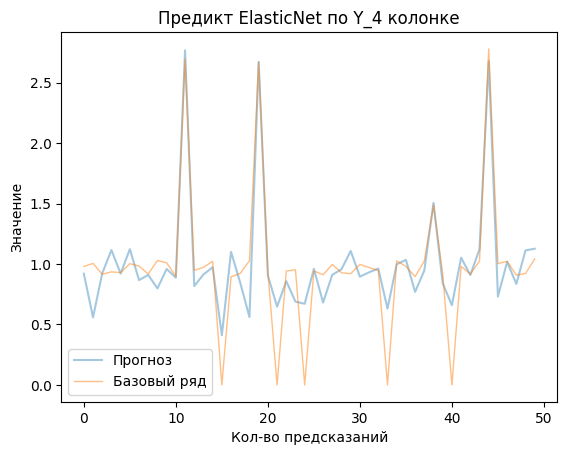

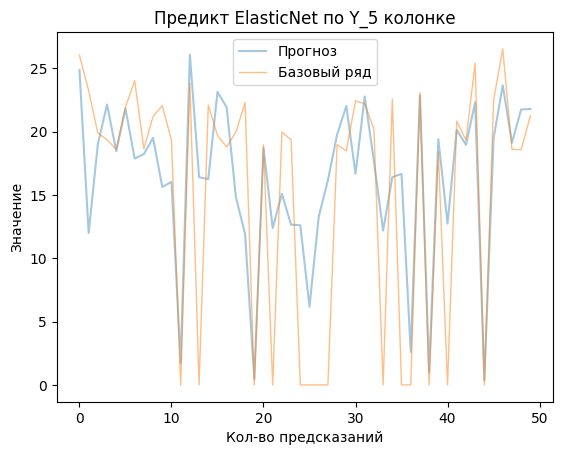

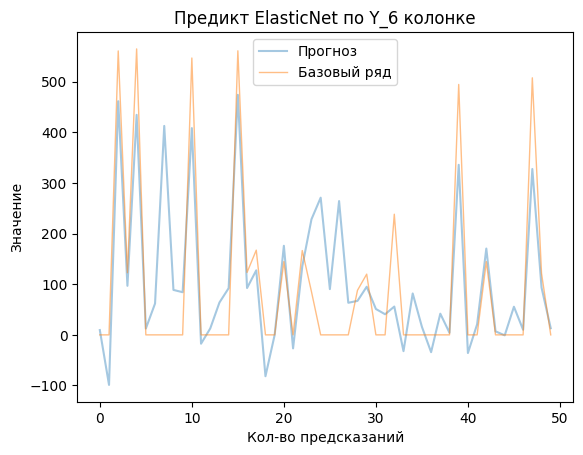

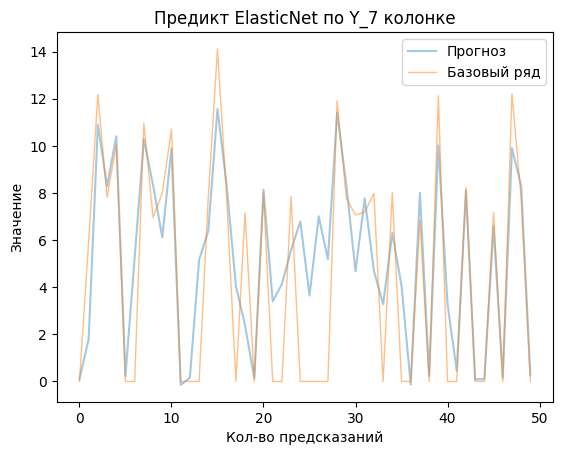

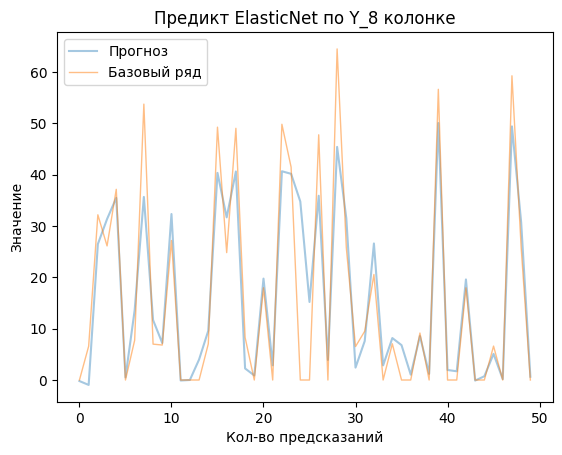

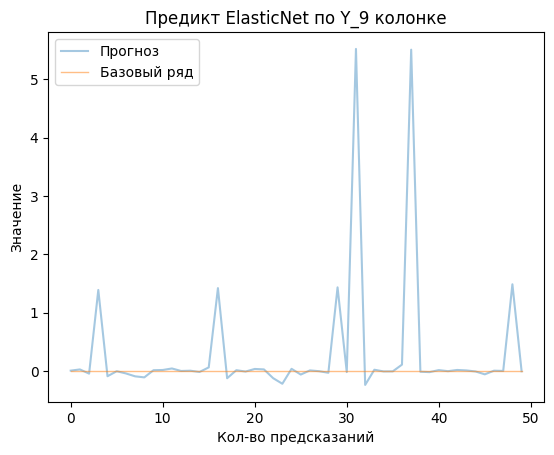

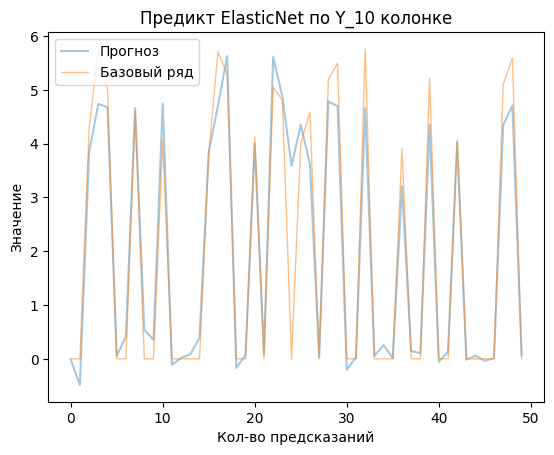

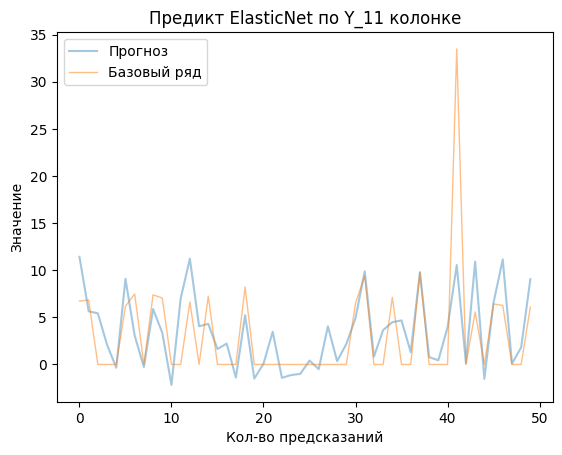

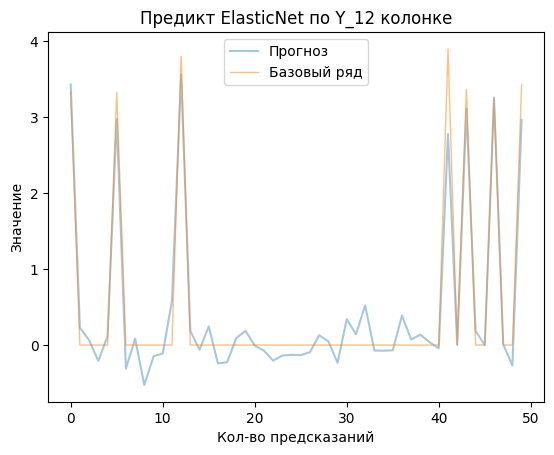

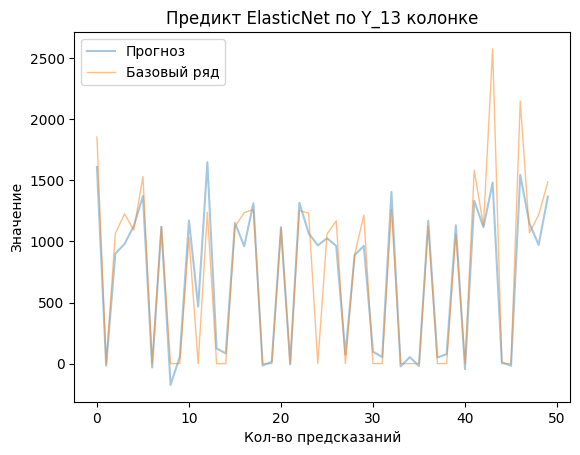

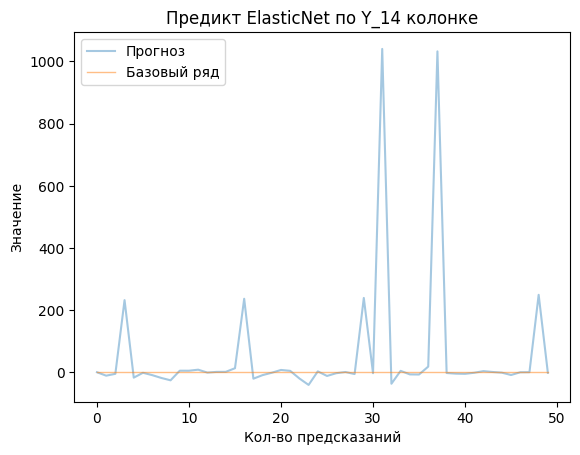

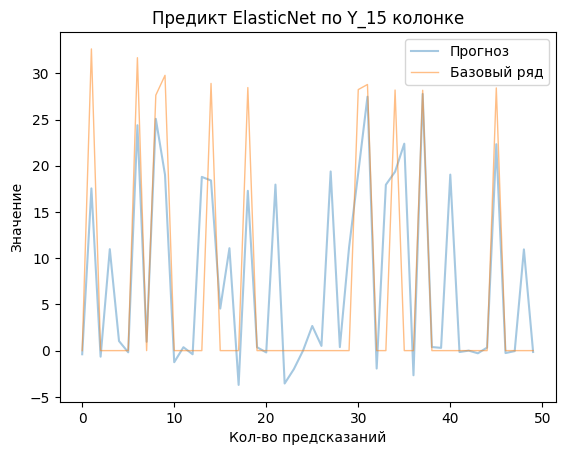

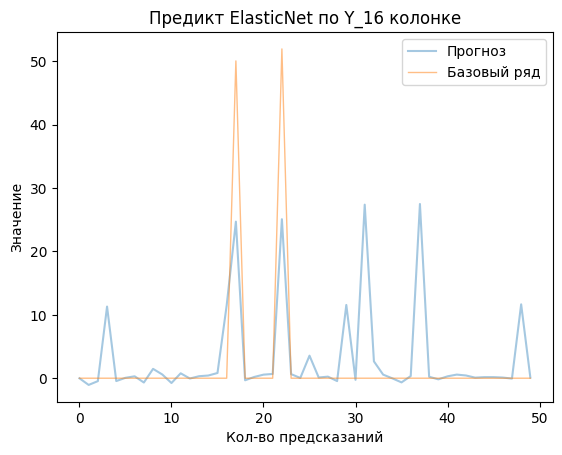

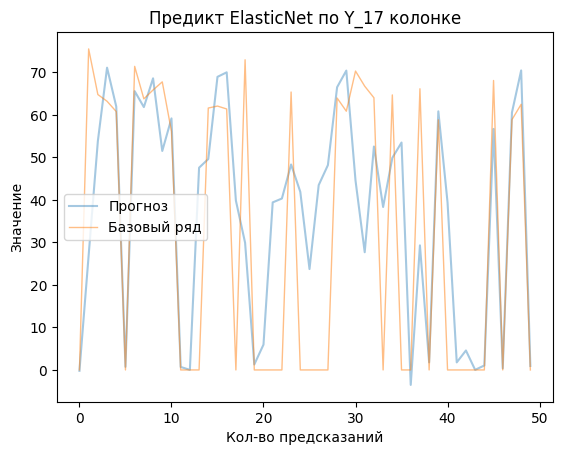

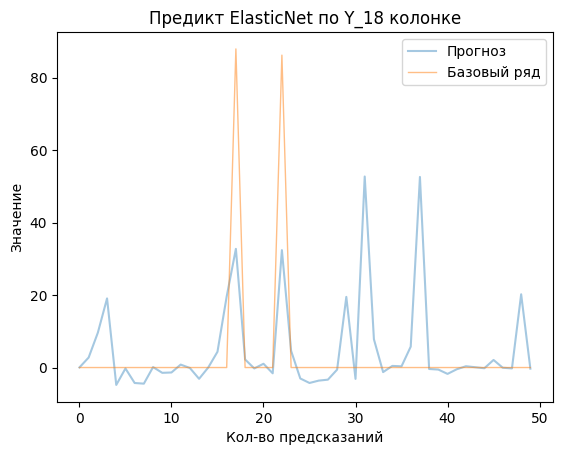

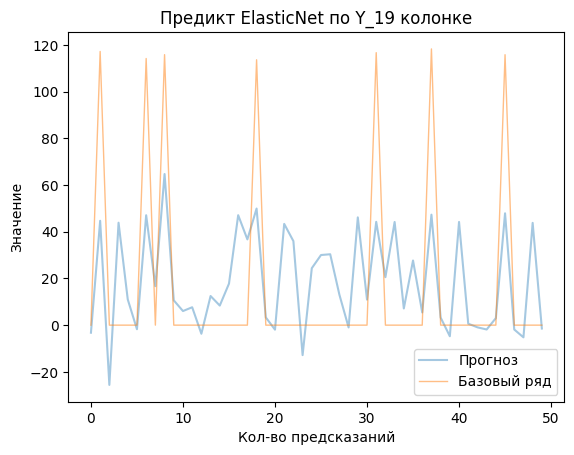

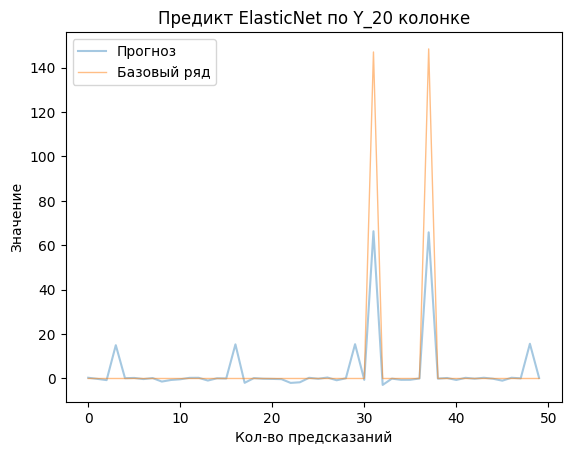

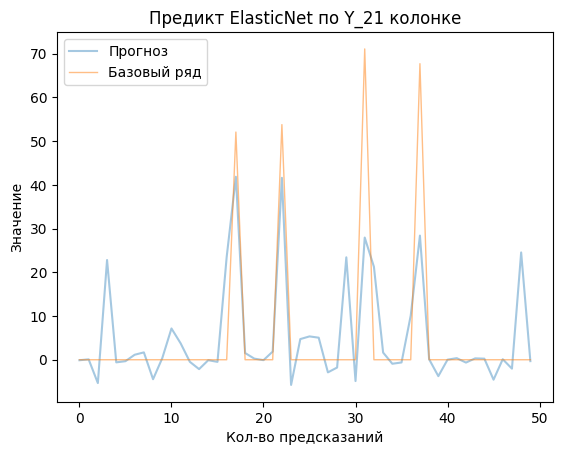

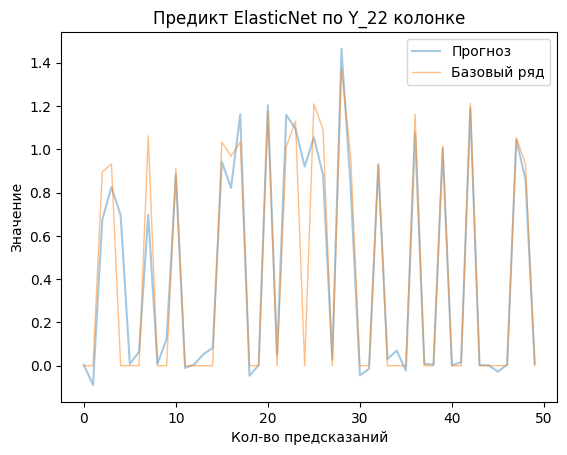

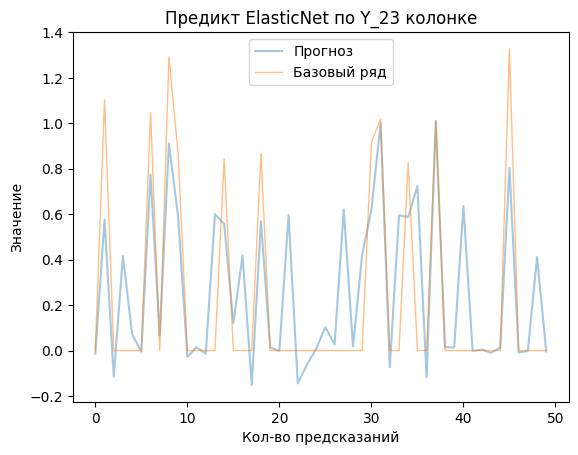

In [ ]:
ypred = model.predict(x_test)

mod_answ = ypred
true = y_test
#mod_answ = y_scaler.inverse_transform(ypred)
#true = y_scaler.inverse_transform(y_test)


  # Отображение предикта сети по 1 колонке
for i in range(24):
  plt.plot(mod_answ[0:50, i],
            label='Прогноз',
            alpha=0.4,
            linewidth=1.5)

  plt.plot(true[0:50, i],
            label='Базовый ряд',
            alpha=0.5,
            linewidth=1)

  plt.title(f'Предикт ElasticNet по {_columns[i]} колонке')
  plt.xlabel('Кол-во предсказаний')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
print(rmse)

[94.76387149343648, 67.54247901892997]


# **Выводы**

Стоит попробовать скалировать данные для большей точности модели.